## Corona Case Study

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd

In [2]:
covid = pd.read_csv('covid_confirmed_daily_updates.csv')
covid_death = pd.read_csv('covid_deaths_daily_updates.csv')
covid_recover = pd.read_csv('covid_recovered_daily_updates.csv')

population = pd.read_csv('population.csv')
#global population
global_pop = pd.read_csv('Global Population.csv')

change_country = {'Mainland China':'People\'s Republic of China', 'US':'United States of America',
                  'Congo (Kinshasa)': 'Democratic Republic of the Congo', 'Cote d\'Ivoire':'Ivory Coast',
                 'Czechia':'Czech Republic', 'Holy See':'Vatican City', 'Korea, South':'South Korea', 'Reunion':'Réunion'}

covid = covid.rename(columns = {'Country/Region':'Country_Region'})
covid_death = covid_death.rename(columns = {'Country/Region':'Country_Region'})
covid_recover = covid_recover.rename(columns = {'Country/Region':'Country_Region'})

for i in change_country:
    covid.loc[covid['Country_Region']==i,'Country_Region'] = change_country[i]
    covid_death.loc[covid_death['Country_Region']==i,'Country_Region'] = change_country[i]
    covid_recover.loc[covid_recover['Country_Region']==i,'Country_Region'] = change_country[i]

In [33]:
# getting the confirmed/ deaths/ recovered data into format
def convert_data(df):
    test = df
    test.set_index('Country_Region')
    test = test.T
    test.columns = test.loc['Country_Region']
    test = test.drop('Country_Region')
    test = test.reindex(sorted(test.columns), axis = 1)
    test  = test.stack().reset_index(name = 'Confirmed')
    return test

covid_1 = convert_data(covid)
covid_1.columns = ['Date','Country_Region','Confirmed']
covid_death_1 = convert_data(covid_death)
covid_death_1.columns = ['Date','Country_Region','Deaths']
covid_recover_1 = convert_data(covid_recover)
covid_recover_1.columns = ['Date','Country_Region','Recovered']

In [4]:
#to update the population data if new countries added
#import qwikidata
#import qwikidata.sparql

#for i in country:
#    if i not in population['Country_Region'].values:
#        print(i+": ", end = '')
#        query = """
#        SELECT ?countryLabel ?population WHERE {
#          ?country rdfs:label "%s"@en .
#          ?country wdt:P1082 ?population .
#          ?country rdfs:label ?countryLabel .
#          FILTER(LANG(?countryLabel) = "en") .
#        }
#        """% (i)
#
#        result = qwikidata.sparql.return_sparql_query_results(query)
#        pop = result['results']['bindings'][0]['population']['value']
#        population = population.append({'Country_Region':i, 'Population': pop}, ignore_index = True)
#
#write the population data to a csv file
#population.to_csv('population.csv', index = False)

In [5]:
#query = """
#        SELECT DISTINCT ?countryLabel ?population
#        {
#          ?country wdt:P31 wd:Q6256 ;
#          wdt:P1082 ?population .
#          SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
#        }
#        GROUP BY ?population ?countryLabel
#        ORDER BY DESC(?population)
#        """

#result = qwikidata.sparql.return_sparql_query_results(query)

#for i in result['results']['bindings']:
#    country = i['countryLabel']['value']
#    population = i['population']['value']
#    
#    if country not in global_pop['Country']:
#        if population != int(global_pop.loc[(global_pop['Country_Region']==country),'Population']):
#            
#            global_pop.loc[(global_pop['Country_Region']==country),'Population'] = population
#
#write the population data to a csv file
#global_pop.to_csv('Global Population.csv', index = False)

In [6]:
covid.shape, covid_death.shape, covid_recover.shape

((125, 53), (125, 53), (125, 53))

In [7]:
country = covid['Country_Region']
dates = pd.to_datetime(covid.columns[1:], format = '%m/%d/%y')

covid19_confirmed = pd.DataFrame(0,columns = country, index = dates)
covid19_death = pd.DataFrame(0,columns = country, index = dates)
covid19_recover = pd.DataFrame(0,columns = country, index = dates)

In [8]:
for i in country:
    temp = covid[covid['Country_Region']==i].T[1:]
    temp.index = dates
    covid19_confirmed[i] = temp

for i in country:
    temp = covid_death[covid_death['Country_Region']==i].T[1:]
    temp.index = dates
    covid19_death[i] = temp

for i in country:
    temp = covid_recover[covid_recover['Country_Region']==i].T[1:]
    temp.index = dates
    covid19_recover[i] = temp

In [9]:
confirmed = covid19_confirmed.iloc[-1,:]
death = covid19_death.iloc[-1,:]
recover = covid19_recover.iloc[-1,:]

In [10]:
total = pd.DataFrame({'Country':covid['Country_Region'], 'Confirmed':confirmed.values, 
                      'Deaths': death.values, 'Recovered': recover.values})

In [11]:
final = pd.DataFrame()

#for i in covid.columns[1:]:
#    for j in country:
#        final = final.append({'Country_Region':j,
#                              'Date':i,
#                              'Confirmed':covid.loc[covid['Country_Region']==j,i],
#                              'Deaths':covid_death.loc[covid_death['Country_Region']==j,i],
#                              'Recovered':covid_recover.loc[covid_recover['Country_Region']==j,i]},
#                              ignore_index = True)

In [12]:
final = covid_1.merge(covid_death_1, on = ['Date','Country_Region'])
final = final.merge(covid_recover_1, on = ['Date','Country_Region'])
final

,Date,Country_Region,Confirmed,Deaths,Recovered
0,1/22/20,Afghanistan,0,0,0
1,1/22/20,Albania,0,0,0
2,1/22/20,Algeria,0,0,0
3,1/22/20,Andorra,0,0,0
4,1/22/20,Antigua and Barbuda,0,0,0
...,...,...,...,...,...
6495,3/13/20,United Arab Emirates,85,0,17
6496,3/13/20,United Kingdom,801,8,19
6497,3/13/20,United States of America,2179,47,12
6498,3/13/20,Vatican City,1,0,0


In [13]:
final['Confirmed'] = final['Confirmed'].astype(int)
final['Deaths'] = final['Deaths'].astype(int)
final['Recovered'] = final['Recovered'].astype(int)
final = final[['Country_Region','Date','Confirmed','Deaths','Recovered']]
final

,Country_Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,1/22/20,0,0,0
1,Albania,1/22/20,0,0,0
2,Algeria,1/22/20,0,0,0
3,Andorra,1/22/20,0,0,0
4,Antigua and Barbuda,1/22/20,0,0,0
...,...,...,...,...,...
6495,United Arab Emirates,3/13/20,85,0,17
6496,United Kingdom,3/13/20,801,8,19
6497,United States of America,3/13/20,2179,47,12
6498,Vatican City,3/13/20,1,0,0


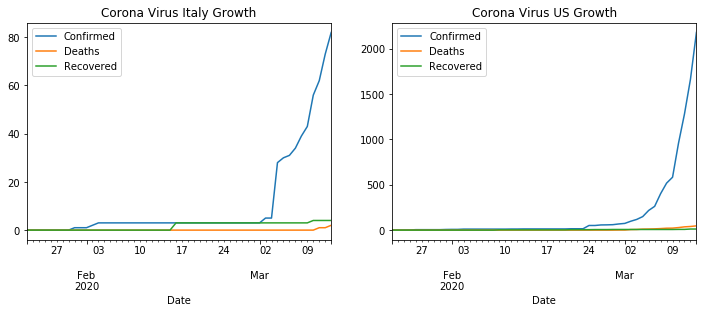

In [14]:
select = ['Date','Confirmed','Deaths','Recovered']
india = final[(final['Country_Region']=='India')][select]
india['Date'] = pd.to_datetime(india['Date'], format = '%m/%d/%y')
india.set_index('Date', inplace= True)

us = final[(final['Country_Region']=='United States of America')][select]
us['Date'] = pd.to_datetime(us['Date'], format = '%m/%d/%y')
us.set_index('Date', inplace= True)

fig, ax = plt.subplots(1,2, figsize=(12,4))

india.plot(ax = ax[0])
ax[0].set_title('Corona Virus Italy Growth')
us.plot(ax = ax[1])
ax[1].set_title('Corona Virus US Growth')

plt.show()

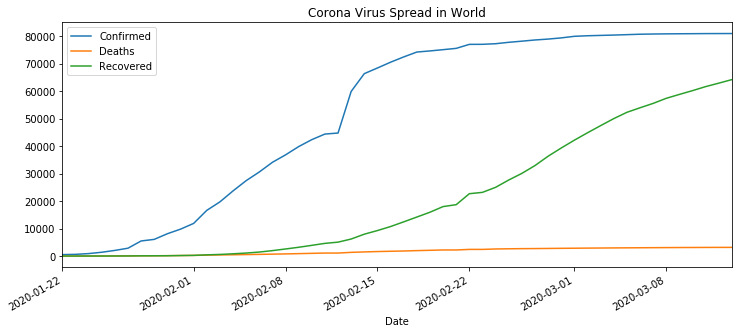

In [15]:
data = final.groupby('Date')[['Confirmed','Deaths','Recovered']].max()
data.index = pd.to_datetime(data.index, format = '%m/%d/%y')

fix, ax = plt.subplots(1,1, figsize = (12,5))
data.plot(ax = ax)
ax.set_title('Corona Virus Spread in World')
#ax.set_xticks(['2020/01/27','2020/02/05'],minor = True)
plt.show()

In [16]:
train = final[['Date', 'Country_Region', 'Confirmed']].copy()

train['Date'] = pd.to_datetime(train['Date'], format = '%m/%d/%y')
train = train.sort_values(['Country_Region','Date'])
train = train.reset_index(drop = True)

# add one day more for prediction
for i in range(1,len(train)+1):
    if(train.iloc[i,1] is not train.iloc[i-1,1]):
        train.loc[len(train)+1,['Date','Country_Region','Confirmed']] = [train.iloc[i-1,0]+ pd.DateOffset(1),train.iloc[i-1,1], 0]

train = train.sort_values(['Country_Region','Date'])
train = train.reset_index(drop = True)

In [17]:
train['1_day_change']=train['3_day_change']=train['7_day_change']=0
train['1_day_change_rate']=train['3_day_change_rate']=train['7_day_change_rate']=0
train['last_day']=0

for i in range(train.shape[0]):
    if(train.iloc[i,1] is train.iloc[i-2,1]):
        train.iloc[i,3] = train.iloc[i-1,2]-train.iloc[i-2,2]
        train.iloc[i,6] = (train.iloc[i-1,2]/train.iloc[i-2,2] - 1)*100
        train.iloc[i,9] = train.iloc[i-1,2]
    
    if(train.iloc[i,1] is train.iloc[i-4,1]):
        train.iloc[i,4] = train.iloc[i-1,2]-train.iloc[i-4,2]
        train.iloc[i,7] = (train.iloc[i-1,2]/train.iloc[i-4,2] - 1)*100
    
    if(train.iloc[i,1] is train.iloc[i-8,1]):
        train.iloc[i,5] = train.iloc[i-1,2]-train.iloc[i-8,2]
        train.iloc[i,8] = (train.iloc[i-1,2]/train.iloc[i-8,2] - 1)*100

train = train.fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [34]:
train = train.replace([np.Inf, -np.Inf], 0)
train = train.merge(population, on = 'Country_Region')

In [35]:
#multiplied with 10000 to take a significant value
train['infected_rate'] = train['last_day']/train['Population'] * 10000
#train[train['infected_rate']==train['infected_rate'].max()]
#display(train.describe())

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
lr = LinearRegression()

In [37]:
col = [#'Date', 'Country',
        'infected_rate','1_day_change', '3_day_change','7_day_change',
       '1_day_change_rate', '3_day_change_rate',
        '7_day_change_rate', 'last_day']
train.columns

Index(['Date', 'Country_Region', 'Confirmed', '1_day_change', '3_day_change',
       '7_day_change', '1_day_change_rate', '3_day_change_rate',
       '7_day_change_rate', 'last_day', 'Population', 'infected_rate'],
      dtype='object')

In [38]:
x_train = train[train['Date']<='2020-02-10']
y_train = train[train['Date']<='2020-02-10']
x_test = train[train['Date']>'2020-02-10']
y_test = train[train['Date']>'2020-02-10']

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2500, 12), (4125, 12), (2500, 12), (4125, 12))

In [40]:
lr.fit(x_train[col], y_train['Confirmed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
pred = lr.predict(x_test[col])
pred = pd.DataFrame(pred)
pred.columns = ['Confirmed_Pred']
pred['Date'] = y_test['Date'].values
pred['Country_Region'] = y_test['Country_Region'].values
pred['Confirmed'] = y_test['Confirmed'].values
pred = pred.sort_values(['Country_Region','Date'])
pred = pred.reset_index(drop = True)

In [42]:
np.sqrt(mean_squared_error(pred[pred['Date']<'2020-03-14']['Confirmed'], pred[pred['Date']<'2020-03-14']['Confirmed_Pred']))

469.86810844519374

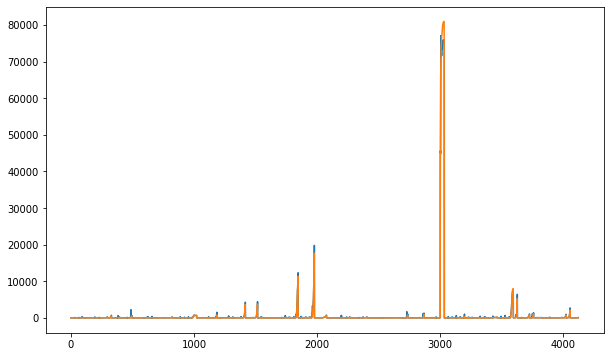

In [43]:
plt.figure(figsize = (10,6))
plt.plot(pred['Confirmed_Pred'])
plt.plot(y_test['Confirmed'].reset_index(drop= True))
plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
train1 = train.copy()
train1.rename(columns={'1_day_change':'o', '3_day_change':'t','7_day_change':'s',
                       '1_day_change_rate':'oo', '3_day_change_rate':'tt','7_day_change_rate':'ss'},inplace = True)
train1.columns

Index(['Date', 'Country_Region', 'Confirmed', 'o', 't', 's', 'oo', 'tt', 'ss',
       'last_day', 'Population', 'infected_rate'],
      dtype='object')

In [226]:
#model = ols('Confirmed~infected_rate+o+t+s+last_day+oo+tt+ss',data = train1).fit()
#model.summary()

In [227]:
#sm.stats.anova_lm(model)

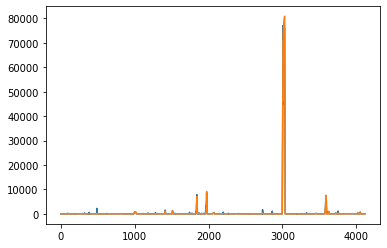

In [48]:
plt.plot(pred[pred['Date']<'2020-03-10']['Confirmed_Pred'])
plt.plot(pred[pred['Date']<'2020-03-10']['Confirmed'])
plt.show()

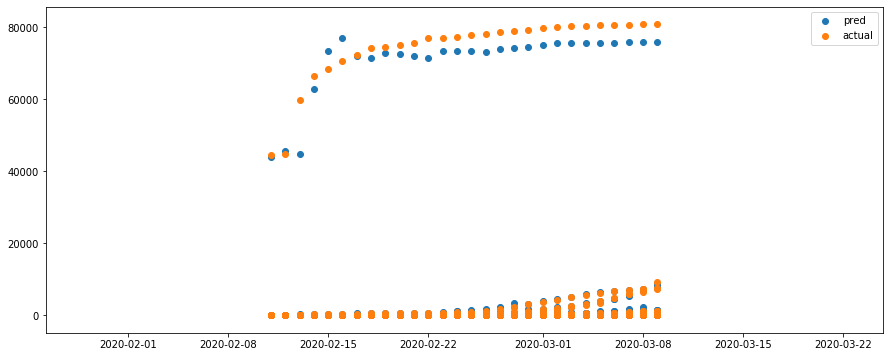

In [49]:
plt.figure(figsize = (15,6))
plt.scatter(pred[pred['Date']<'2020-03-10']['Date'],pred[pred['Date']<'2020-03-10']['Confirmed_Pred'],label = 'pred')
plt.scatter(pred[pred['Date']<'2020-03-10']['Date'],pred[pred['Date']<'2020-03-10']['Confirmed'], label = 'actual')
plt.legend()
plt.show()

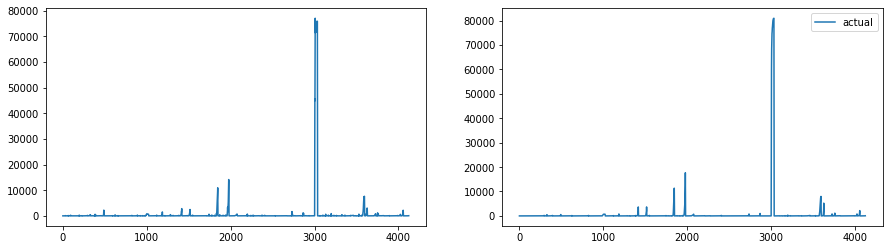

In [50]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
ax[0].plot(pred[pred['Date']<'2020-03-14']['Confirmed_Pred'],label = 'pred')
ax[1].plot(pred[pred['Date']<'2020-03-14']['Confirmed'], label = 'actual')
plt.legend()
plt.show()

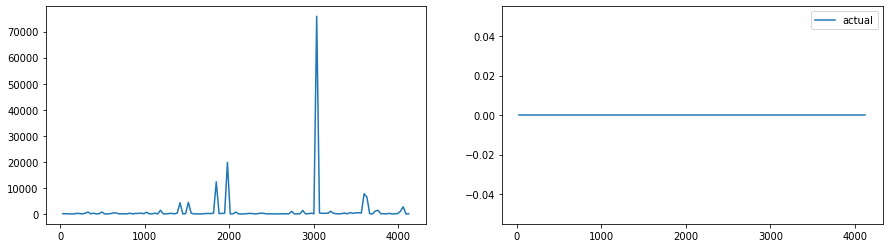

In [51]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
ax[0].plot(pred[pred['Date']>='2020-03-14']['Confirmed_Pred'],label = 'pred')
ax[1].plot(pred[pred['Date']>='2020-03-14']['Confirmed'], label = 'actual')
plt.legend()
plt.show()